##### a)

Toate clicile sunt:  [['A4', 'A3'], ['A4', 'A5', 'A2'], ['A1', 'A3'], ['A1', 'A2']]


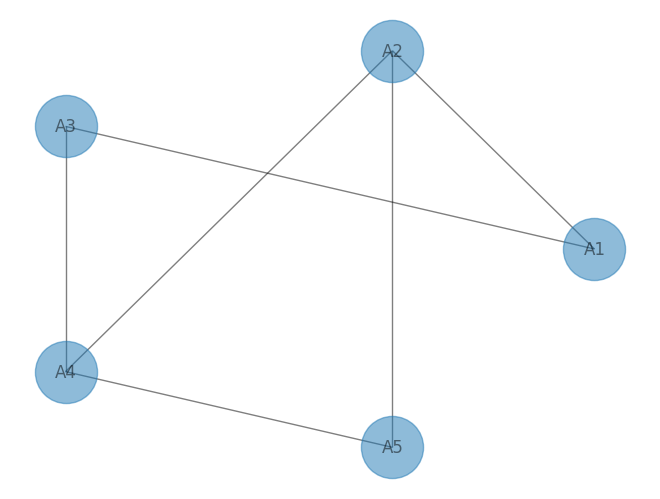

In [22]:
from pgmpy.models import MarkovNetwork
import networkx as nx
import matplotlib.pyplot as plt

model = MarkovNetwork()

nodes = ['A1', 'A2', 'A3', 'A4', 'A5']
for node in nodes:
    model.add_node(node)

edges = [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]
for edge in edges:
    model.add_edge(*edge)

G = nx.Graph()
G.add_edges_from(model.edges())
maximal_cliques = list(nx.find_cliques(G))
print('Toate clicile sunt: ', maximal_cliques)

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

##### b)

In [26]:
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np

states = [0, 1]

matrix = {
    'A1': [0.4, 0.6],
    'A2': [0.2, 0.8],
    'A3': [0.1, 0.9],
    'A4': [0.5, 0.5],
    'A5': [0.4, 0.6]
    }
factor = DiscreteFactor(['A3', 'A4'], [2, 2],
                             values=[
                                 np.exp(3*0 + 4*0), np.exp(3*0 + 4*1),
                                 np.exp(3*1 + 4*0), np.exp(3*1 + 4*1)
                             ])
model.add_factors(factor)

factor = DiscreteFactor(['A2', 'A4', 'A5'], [2, 2, 2],
                             values=[
                                 np.exp(2*0 + 4*0 + 5*0), np.exp(2*0 + 4*0 + 5*1),
                                 np.exp(2*0 + 4*1 + 5*0), np.exp(2*0 + 4*1 + 5*1),
                                 np.exp(2*1 + 4*0 + 5*0), np.exp(2*1 + 4*0 + 5*1),
                                 np.exp(2*1 + 4*1 + 5*0), np.exp(2*1 + 4*1 + 5*1)
                             ])
model.add_factors(factor)

factor =  DiscreteFactor(['A1', 'A2'], [2, 2],
                             values=[
                                 np.exp(1*0 + 2*0), np.exp(1*0 + 2*1),
                                 np.exp(1*1 + 2*0), np.exp(1*1 + 2*1)
                             ])
model.add_factors(factor)

factor = DiscreteFactor(['A1', 'A3'], [2, 2],
                             values=[
                                 np.exp(1*0 + 3*0), np.exp(1*0 + 3*1),
                                 np.exp(1*1 + 3*0), np.exp(1*1 + 3*1)
                             ])
model.add_factors(factor)


model.check_model()

bp = BeliefPropagation(model)

map_result = bp.map_query(variables=nodes)

for station, state in map_result.items():
    state_name = states[state] 
    print(f"{station}: {state_name}")


A1: 1
A2: 1
A3: 1
A4: 1
A5: 1
